
**Task 2: Multiple Linear Regression**

1 Use the same dataset or load another dataset with at least 4 numeric features.

2 Predict the target variable using multiple independent variables.

3 Evaluate the model using:

 R-squared
 Mean Squared Error (MSE)
 Root Mean Squared Error (RMSE)

 Display the coefficients of each feature.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [4]:

df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [5]:

input_colms=data.feature_names
output_colms=data.target_names

X_data = df[input_colms]
Y_data = df[output_colms]
X_data.head()
Y_data.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [6]:

X_data = X_data
Y_data = Y_data.values.reshape(-1)

In [7]:

print(X_data.shape, Y_data.shape)

(20640, 8) (20640,)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_data,Y_data,train_size = 0.2,random_state=42)

In [9]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(model.intercept_)
model.coef_

-37.76430484547502


array([ 4.25546113e-01,  9.15501577e-03, -9.43236037e-02,  6.74748060e-01,
        4.88938032e-06, -1.50778303e-03, -4.27714004e-01, -4.42739701e-01])

In [10]:
# R-squared
r2 = r2_score(y_test, y_pred)

# MSE
mse = mean_squared_error(y_test, y_pred)

# RMSE
rmse = np.sqrt(mse)

print(f"R2 Score: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

R2 Score: 0.6070
Mean Squared Error (MSE): 0.5218
Root Mean Squared Error (RMSE): 0.7224


In [11]:

# Create a DataFrame to display feature names and their coefficients
coefficients = pd.DataFrame({
    'Feature': data.feature_names,
    'Coefficient': model.coef_
})

print("\nFeature Coefficients:")
print(coefficients)


Feature Coefficients:
      Feature  Coefficient
0      MedInc     0.425546
1    HouseAge     0.009155
2    AveRooms    -0.094324
3   AveBedrms     0.674748
4  Population     0.000005
5    AveOccup    -0.001508
6    Latitude    -0.427714
7   Longitude    -0.442740


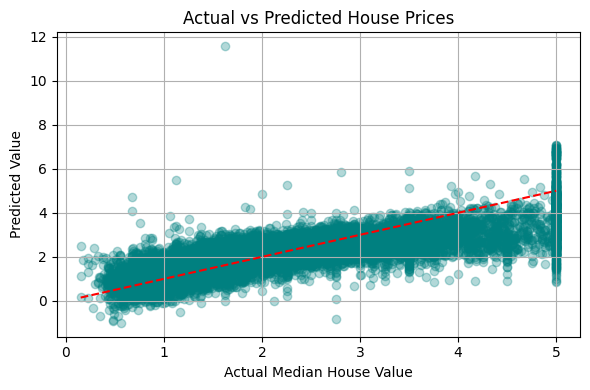

In [12]:

plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, alpha=0.3, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Value")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.tight_layout()
plt.show()